# Classification model for document class prediction

## Part 1 : data preparation

### 1.A. Extraction of top labels (in terms of frequency) and the associated label (the outputs)

In [22]:
import os
import re
import numpy as np
from sklearn import svm


sources_directory = "./CC/CC-src"

print(os.getcwd())

C:\Users\gauqu\Desktop\Projet PRIM 2022-2023\document_class_classification


In [23]:
list_sources = os.listdir(sources_directory)
print(list_sources)

['0904.1630', '0904.2058', '0904.2310', '0904.2759', '0904.3116', '0904.3169', '0904.3273', '0904.3912', '0904.3927', '0904.3941', '0904.4331', '0904.4360', '0904.4512', '0905.0602', '0905.1202', '0905.1215', '0905.1271', '0905.1300', '0905.1993', '0905.2381', '0905.2419', '0905.2485', '0905.2918', '0905.3108', '0905.3720', '0905.3757', '0905.3802', '0905.4100', '0905.4251', '0906.0205', '0906.0687', '0906.1226', '0906.1399', '0906.1489', '0906.1702', '0906.2154', '0906.2812', '0906.3051', '0906.3119', '0906.3162', '0906.3186', '0906.3197', '0906.3199', '0906.3208', '0906.3213', '0906.3225', '0906.3227', '0906.3228', '0906.3231', '0906.3248', '0906.3251', '0906.3284', '0906.3306', '0906.3327', '0906.3329', '0906.3332', '0906.3469', '0906.3554', '0906.3643', '0906.3765', '0906.4162', '0906.4216', '0906.4291', '0906.4431', '0906.4816', '0906.5112', '0906.5475', '0907.0088', '0907.0159', '0907.0774', '0907.1103', '0907.1297', '0907.1307', '0907.1579', '0907.1724', '0907.2621', '0907.2639'

In [24]:
tex_files = []
class_per_source = []
sources_names = []
cpt = 0

for source in list_sources:
    sources_names.append(source)
    classes = []
    for file_name in os.listdir(sources_directory + "/" + source):
        
        if file_name.__contains__(".tex") and not file_name.__contains__(".bak"):
            tex_files.append(file_name)
            
            #try:
            #    data = open(sources_directory + "/" + source + "/" + file_name).read()
            #    print(sources_directory + "/" + source + "/" + file_name)

            #    for doc_class in re.findall(r'\\documentclass(.*)}', data): # Echapper \ ? Pourcent de commentaire à échapper ou retour à la ligne
                
            #        if not doc_class.__contains__('{') and doc_class.__contains__('%'):
            #            pass # One problematic case over all examples
            #        else:
            #            doc_class = doc_class.split('{', 1)[1]
            #            doc_class = doc_class.split('}', 1)[0]
            #            classes.append(doc_class)
                        
            #except UnicodeDecodeError as error:
            #    print(error)
            #    pass # Some files can't be read ... 
            
            #data = open(sources_directory + "/" + source + "/" + file_name)
            
            try:
                data = open(sources_directory + "/" + source + "/" + file_name)
                not_found_yet = True
                
                while not_found_yet:
                    line = data.readline()
                    pattern = re.compile(r'\\documentclass(.*)}')
                    
                    if not line:
                        break
                    
                    if pattern.match(line):
                        not_found_yet = False
                        doc_class = pattern.search(line).group()
                        if not doc_class.__contains__('{') and doc_class.__contains__('%'):
                            pass # One problematic case over all examples
                        else:
                            doc_class = doc_class.split('{', 1)[1]
                            doc_class = doc_class.split('}', 1)[0]
                            classes.append(doc_class)
                    
            except UnicodeDecodeError as error:
                print(error)
                pass # Some files can't be read ...
                    
                        
            
    if len(classes) > 0:
        classes = classes[0]
        cpt = cpt+1
    
    else:
        classes = None 
        
    class_per_source.append(classes)
            
print(100 * (cpt / len(list_sources)))

'charmap' codec can't decode byte 0x9d in position 2696: character maps to <undefined>
'charmap' codec can't decode byte 0x8d in position 1486: character maps to <undefined>
'charmap' codec can't decode byte 0x8f in position 5356: character maps to <undefined>
'charmap' codec can't decode byte 0x8d in position 3649: character maps to <undefined>
'charmap' codec can't decode byte 0x8d in position 59: character maps to <undefined>
'charmap' codec can't decode byte 0x8f in position 626: character maps to <undefined>
'charmap' codec can't decode byte 0x9d in position 4833: character maps to <undefined>
'charmap' codec can't decode byte 0x8f in position 313: character maps to <undefined>
'charmap' codec can't decode byte 0x9d in position 1063: character maps to <undefined>
'charmap' codec can't decode byte 0x8f in position 95: character maps to <undefined>
'charmap' codec can't decode byte 0x8f in position 14: character maps to <undefined>
'charmap' codec can't decode byte 0x81 in position 

'charmap' codec can't decode byte 0x9d in position 21: character maps to <undefined>
'charmap' codec can't decode byte 0x9d in position 1155: character maps to <undefined>
'charmap' codec can't decode byte 0x81 in position 3316: character maps to <undefined>
'charmap' codec can't decode byte 0x81 in position 4220: character maps to <undefined>
'charmap' codec can't decode byte 0x90 in position 4492: character maps to <undefined>
'charmap' codec can't decode byte 0x9d in position 5137: character maps to <undefined>
'charmap' codec can't decode byte 0x8d in position 899: character maps to <undefined>
'charmap' codec can't decode byte 0x81 in position 5461: character maps to <undefined>
'charmap' codec can't decode byte 0x81 in position 4607: character maps to <undefined>
'charmap' codec can't decode byte 0x81 in position 939: character maps to <undefined>
'charmap' codec can't decode byte 0x81 in position 25: character maps to <undefined>
'charmap' codec can't decode byte 0x81 in positio

In [25]:
print(class_per_source)
print(len(class_per_source))

for index in range(len(class_per_source)):
    if class_per_source[index] is not None:
        class_per_source[index] = class_per_source[index].split("-")[0]
        # Problem with Levenshtein distance when considering lipics-v2019 for instance (6 / 6)
        
print(class_per_source)

[None, 'article', 'article', 'article', 'article', 'article', 'IEEEtran', 'article', None, 'article', 'article', 'article', 'article', 'article', 'llncs', 'IEEEtran', 'article', 'article', 'article', 'article', 'article', 'article', None, 'IEEEtran', 'article', 'article', 'tlp', 'article', 'acmtrans2m', 'article', 'article', 'article', 'article', 'llncs', 'article', 'LMCS', 'llncs', 'eptcs', 'eptcs', 'article', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'article', 'ws-book9x6', 'article', 'elsarticle', 'eptcs', 'acmtrans2m', 'siamltex704', 'article', 'article', 'article', 'article', 'amsproc', 'article', 'siamltex', 'article', 'article', 'article', 'revtex4', 'article', 'article', 'article', 'article', 'amsart', 'llncs', 'article', 'article', 'llncs', 'article', 'article', 'llncs', 'article', 'amsart', 'eptcs', 'article', None, 'llncs', None, None, 'article', 'siamltex', 'revtex4', 'art

In [26]:
print(sources_names)
print(len(sources_names))

['0904.1630', '0904.2058', '0904.2310', '0904.2759', '0904.3116', '0904.3169', '0904.3273', '0904.3912', '0904.3927', '0904.3941', '0904.4331', '0904.4360', '0904.4512', '0905.0602', '0905.1202', '0905.1215', '0905.1271', '0905.1300', '0905.1993', '0905.2381', '0905.2419', '0905.2485', '0905.2918', '0905.3108', '0905.3720', '0905.3757', '0905.3802', '0905.4100', '0905.4251', '0906.0205', '0906.0687', '0906.1226', '0906.1399', '0906.1489', '0906.1702', '0906.2154', '0906.2812', '0906.3051', '0906.3119', '0906.3162', '0906.3186', '0906.3197', '0906.3199', '0906.3208', '0906.3213', '0906.3225', '0906.3227', '0906.3228', '0906.3231', '0906.3248', '0906.3251', '0906.3284', '0906.3306', '0906.3327', '0906.3329', '0906.3332', '0906.3469', '0906.3554', '0906.3643', '0906.3765', '0906.4162', '0906.4216', '0906.4291', '0906.4431', '0906.4816', '0906.5112', '0906.5475', '0907.0088', '0907.0159', '0907.0774', '0907.1103', '0907.1297', '0907.1307', '0907.1579', '0907.1724', '0907.2621', '0907.2639'

In [27]:
from collections import Counter

classes = {x:class_per_source.count(x) for x in class_per_source}

size_of_trainable_sources = len(sources_names) - classes[None] - classes['article'] - 2

del classes[None]
del classes['article']

sorted_classes = sorted(classes, key=classes.get, reverse=True)

nb_classes = range(1, len(classes.keys()))
pct_covered_sources = []

for value in nb_classes:
    problem_classes = sorted_classes[:value]

    covered_sources_with_pb_classes = 0

    for pb_class in problem_classes: 
        covered_sources_with_pb_classes += classes[pb_class] / size_of_trainable_sources
        
    pct_covered_sources.append(100 * covered_sources_with_pb_classes)

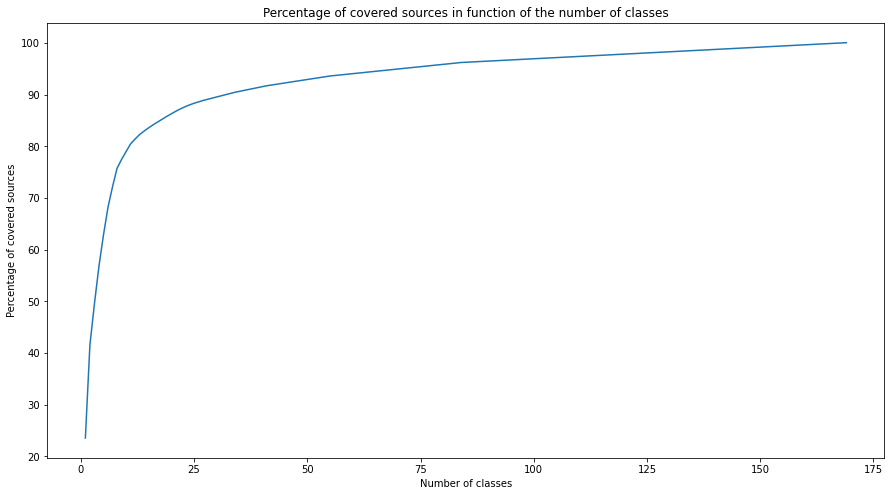

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.plot(nb_classes, pct_covered_sources)
plt.xlabel("Number of classes")
plt.ylabel("Percentage of covered sources")
plt.title("Percentage of covered sources in function of the number of classes")
plt.show()

# We reduce the number of classes by ~30 by splitting on -

In [29]:
k = 15#mber of classes in the model

problem_classes = sorted_classes[:k]

covered_sources_with_pb_classes = 0

for pb_class in problem_classes: 
    covered_sources_with_pb_classes += classes[pb_class] / size_of_trainable_sources
    
print("Percentage of covered sources with " + str(k) + " classes : " + str(100 * covered_sources_with_pb_classes))

Percentage of covered sources with 15 classes : 83.59621451104103


In [30]:
trainable_file_names = []
trainable_outputs = []

for index in range(0, len(sources_names) - 2): # - 2 since there are also two folders "compressed" and "tmp"
    if not(class_per_source[index] == None or class_per_source[index] == "article"):
        if class_per_source[index] in problem_classes:
            trainable_outputs.append(class_per_source[index])
            trainable_file_names.append(sources_names[index])

In [31]:
print(len(trainable_file_names))
print(trainable_file_names)

1855
['0904.3273', '0905.1202', '0905.1215', '0905.3108', '0906.1489', '0906.2154', '0906.2812', '0906.3051', '0906.3119', '0906.3186', '0906.3197', '0906.3199', '0906.3208', '0906.3213', '0906.3225', '0906.3227', '0906.3228', '0906.3231', '0906.3248', '0906.3251', '0906.3284', '0906.3306', '0906.3327', '0906.3329', '0906.3332', '0906.3765', '0906.4162', '0907.0774', '0907.1579', '0907.2850', '0907.3117', '0907.3780', '0907.4488', '0907.4775', '0907.5130', '0907.5575', '0908.1397', '0908.1599', '0908.2122', '0908.2782', '0908.3954', '0908.3981', '0908.4041', '0908.4494', '0909.1102', '0909.1594', '0909.2694', '0909.3005', '0909.3787', '0909.4766', '0909.5029', '0909.5038', '0909.5097', '0909.5293', '0909.5313', '0910.0582', '0910.1268', '0910.2058', '0910.2443', '0910.4224', '0910.4353', '0910.5107', '0910.5819', '0911.1813', '0911.2280', '0911.2317', '0911.2322', '0911.2325', '0911.3438', '0911.3492', '0911.3674', '0911.3708', '0911.4322', '0912.0309', '0912.0746', '0912.0928', '0912.

In [32]:
print(len(trainable_outputs))
print(trainable_outputs)
# Distance de Levenstein pour regrouper les classes similaires, petite distance (seuil de 2 ou 3) 
# Enlever tout ce qui est après un tiret
# Tester avec les préfixes aussi 

1855
['IEEEtran', 'llncs', 'IEEEtran', 'IEEEtran', 'llncs', 'LMCS', 'llncs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'eptcs', 'elsarticle', 'eptcs', 'siamltex', 'revtex4', 'amsart', 'llncs', 'llncs', 'llncs', 'amsart', 'eptcs', 'llncs', 'siamltex', 'revtex4', 'amsart', 'revtex4', 'amsart', 'revtex4', 'elsarticle', 'amsart', 'llncs', 'amsart', 'amsart', 'revtex4', 'llncs', 'revtex4', 'eptcs', 'eptcs', 'LMCS', 'llncs', 'stacs', 'llncs', 'LMCS', 'revtex4', 'amsart', 'amsart', 'IEEEtran', 'scrartcl', 'llncs', 'sig', 'elsarticle', 'eptcs', 'eptcs', 'eptcs', 'revtex4', 'elsarticle', 'siamltex', 'llncs', 'amsart', 'llncs', 'revtex4', 'llncs', 'llncs', 'llncs', 'amsart', 'llncs', 'stacs', 'stacs', 'stacs', 'llncs', 'llncs', 'stacs', 'stacs', 'stacs', 'stacs', 'stacs', 'stacs', 'amsart', 'stacs', 'llncs', 'stacs', 'stacs', 'sig', 'llncs', 'stacs', 'stacs', 'scrartcl', 'amsart', 'elsa

### 1.B. Extraction of features via PDFAlto (training set)

#### Features to be extracted : 

 1. The principal indent size (space between the very-left of the page and the beginning of the text in a regular paragraph. To do so, we must, among all the \<TextBlock\>, find the majoritarian "HPOS" value (but with this, we consider that, in the     paper, there will be more written explanations that mathematical formulas ...  Pb : Document multi-colonnes : si plusieurs choix dans la "majorité", prendre la marge la plus faible. Sig-alternate : classe multi-colonnes. 
   
 2. The main used font-type. We can either take all "STYLEREFS" and find the main associated "FONTFAMILY", or focus on all TextBlocks that have the majoritarian "HPOS", then look at their "STYLEREFS" and finally take the majoritarian associated "FONTFAMILY". Pb : Nom de police parfois automatiquement généré (regarder si le nom de police n'est pas généré juste une seule fois. PDF font liste les noms de police. Parfois (le plus courant) on a un nom automatiuement généré puis le vrai nom. Indépendant de la taille normalement : à parser.
 
 3. The "main" font-size. By "main" font-size, I mean the font-size that is used in the regular TextBlocks, i.e. the ones that have the majoritarian "HPOS". Concretely, it corresponds to the paragraphs that only contain english text with explanations. 
 
 4. (and 5.) Similar features for the figure descriptions. It is most likely that a paper does contain figures, as we are not sure that it will contain theorems, lemms and so on (even though the selected papers should). So 2 new features : main used font-type and font-size (the HPOS is useless, since figure description are - almost - always centered, and their HPOS are therefore relative to the length of the description itself). 
 
 5. Similar features for the abstract, with HPOS. Aussi à identifier (avec Grobid).
 
 Grobid permets d'extraire le genre d'informations pour 4 et 5. Pour les hyperliens aussi. 
 
 Utiliser une liste de mots-clés sinon (Figure, Fig., Th., Theorem, etc).
 
 Autres idées : les autre marges (hautes et basses), top-k polices utilisées, proportion du texte en telle police (pour chaque famille de police, proportion du texte qui utilise cette police), références bibliographiques (grobid).
 
 Grobid bug (perds parfois du texte). Il perds de l'information par rapport à PDF Alto.

In [33]:
training_set_size = 1855
#training_set_size = 50
number_of_features = 4

## 

## 

In [ ]:
# Features 1 to 4

# Parsing sax des documents 

import xml.etree.ElementTree as ET

representativeness = []

training_set = np.full((training_set_size, number_of_features), None)

for index in range(0, training_set_size):
    file_name = "./CC/CC-pdf/" + trainable_file_names[index] + ".xml"
    
    tree = ET.parse(file_name)
    root = tree.getroot()

    h_positions_textblocks = []
    v_positions_textblocks = []
    font_per_string = []

    for element in root.findall("./{http://www.loc.gov/standards/alto/ns-v3#}Layout/{http://www.loc.gov/standards/alto/ns-v3#}Page/{http://www.loc.gov/standards/alto/ns-v3#}PrintSpace/*"):
        if element.tag == '{http://www.loc.gov/standards/alto/ns-v3#}TextBlock':
            h_positions_textblocks.append(round(float(element.attrib['HPOS']), 1))
            
    
    for element in root.findall("./{http://www.loc.gov/standards/alto/ns-v3#}Layout/{http://www.loc.gov/standards/alto/ns-v3#}Page/*"):
        for child in element:
            v_positions_textblocks.append(round(float(child.attrib['VPOS']), 1))
            break # We only want the first element to know its VPOS on top of the page
                 

    occurences_h_positions_textblocks = {x:h_positions_textblocks.count(x) for x in h_positions_textblocks}
    majoritarian_hpos = sorted(occurences_h_positions_textblocks, key=occurences_h_positions_textblocks.get, reverse=True)[0]
    
    occurences_v_positions_textblocks = {x:v_positions_textblocks.count(x) for x in v_positions_textblocks}
    majoritarian_vpos = sorted(occurences_v_positions_textblocks, key=occurences_v_positions_textblocks.get, reverse=True)[0]

 
    for element in root.findall("./{http://www.loc.gov/standards/alto/ns-v3#}Layout/{http://www.loc.gov/standards/alto/ns-v3#}Page/{http://www.loc.gov/standards/alto/ns-v3#}PrintSpace/{http://www.loc.gov/standards/alto/ns-v3#}TextBlock/{http://www.loc.gov/standards/alto/ns-v3#}TextLine/*"):
          if element.tag == "{http://www.loc.gov/standards/alto/ns-v3#}String":
                font_per_string.append(element.attrib['STYLEREFS'])

    occurences_font_per_string = {x:font_per_string.count(x) for x in font_per_string} 
    representativeness.append(occurences_font_per_string[sorted(occurences_font_per_string, key=occurences_font_per_string.get, reverse=True)[0]] / len(font_per_string))
    majoritarian_font_per_string = sorted(occurences_font_per_string, key=occurences_font_per_string.get, reverse=True)[0]

    majoritarian_font_size = 0
    majoritarian_font_family = ""

    for element in root.findall("./{http://www.loc.gov/standards/alto/ns-v3#}Styles/*"):
        if element.attrib['ID'] == majoritarian_font_per_string:
            majoritarian_font_size = round(float(element.attrib['FONTSIZE']), 1)
            majoritarian_font_family = element.attrib['FONTFAMILY']
            
    training_set[index, 0] = majoritarian_hpos
    training_set[index, 1] = majoritarian_vpos
    training_set[index, 2] = majoritarian_font_size
    training_set[index, 3] = majoritarian_font_family
    
    print(training_set[index,])
    
    # Vérifier la pertinence des résultats (regarder les valeurs des classes majoritaires et à quelle point elles sont représentatives)

print(representativeness)

[49.0 30.6 10.0 'nimbusromno9l']
[134.8 119.0 10.0 'times']
[312.0 59.5 10.0 'nimbusromno9l']
[54.0 77.2 10.0 'times']
[134.8 118.3 10.0 'cmr10']
[90.0 76.1 10.9 'cmr10']
[134.8 118.3 10.0 'cmr10']
[79.2 38.5 10.9 'times']
[79.2 38.4 10.9 'times']
[79.2 38.4 10.9 'times']
[79.2 38.5 10.9 'times']
[79.2 38.4 10.9 'times']
[79.2 38.5 10.9 'times']
[79.2 38.5 10.9 'times']
[79.2 38.4 10.9 'times']
[79.2 35.9 10.9 'nimbusromno9l']
[79.2 38.4 10.9 'times']
[79.2 38.5 10.9 'times']
[79.2 38.5 10.9 'times']
[79.2 379.9 10.9 'times']
[79.2 38.9 10.9 'nimbusromno9l']
[79.2 38.5 10.9 'times']
[79.2 38.9 10.9 'nimbusromno9l']
[79.2 38.9 10.9 'nimbusromno9l']
[79.2 38.9 10.9 'nimbusromno9l']
[110.9 128.8 12.0 'cmr12']
[79.2 38.5 10.9 'times']
[108.0 74.5 10.0 'cmr10']
[64.8 53.5 10.0 'cmr10']
[72.0 59.8 10.9 'cmr10']
[134.8 119.0 10.0 'cmr10']
[81.0 102.7 10.9 'cmr10']
[134.8 118.3 10.0 'cmr10']
[72.0 91.8 10.9 'cmr10']
[79.2 38.5 10.9 'times']
[134.8 123.5 7.2 '']
[107.9 98.8 10.0 'cmr10']
[72.0 

[126.7 97.1 10.0 'cmr10']
[81.0 103.8 10.9 'nimbusromno9l']
[72.0 38.9 10.9 'cmr10']
[134.8 118.3 10.0 'cmr10']
[118.3 97.9 10.0 'cmr10']
[89.3 87.1 10.9 'cmr10']
[126.7 97.1 10.0 'cmr10']
[81.0 112.2 10.9 'cmr10']
[134.8 119.0 10.0 'times']
[133.8 127.3 10.0 'cmr10']
[72.0 74.5 10.9 'times']
[110.9 128.8 12.0 'sfrm1200']
[85.1 87.8 10.9 'cmr10']
[71.4 80.8 12.0 'sfrm1200']
[99.1 38.1 10.0 'lmroman10']
[81.0 73.9 10.9 'cmr10']
[72.0 74.5 10.0 'cmr10']
[126.7 97.1 10.0 'sfrm1000']
[72.0 75.0 10.0 'cmr10']
[134.8 118.3 10.0 'cmr10']
[72.0 71.5 10.9 'cmr10']
[123.5 107.0 10.9 'cmr10']
[134.8 118.3 10.0 'cmr10']
[72.0 73.8 10.9 'cmr10']
[134.8 93.1 10.0 'cmr10']
[110.2 75.9 10.0 'cmr10']
[81.0 77.4 10.9 'cmr10']
[72.0 73.9 10.9 'cmr10']
[134.8 94.3 10.0 'cmr10']
[79.2 118.3 10.0 'cmr10']
[134.8 118.3 10.0 'cmr10']
[134.8 124.3 10.9 'sfrm1095']
[79.2 38.5 10.9 'times']
[79.2 38.5 10.0 'utopia']
[79.2 38.9 10.9 'nimbusromno9l']
[133.8 127.3 10.0 'cmr10']
[341.7 28.6 10.0 'cmr10']
[45.0 59.5 

In [ ]:
distinct_fonts = []

for font in training_set[:, 3]:
    if not(font in distinct_fonts):
        distinct_fonts.append(font)

for index in range(0, training_set_size):
    for distinct_fonts_index in range(0, training_set_size):
        if distinct_fonts[distinct_fonts_index] == training_set[index, 3]:
            training_set[index, 3] = distinct_fonts_index
            break
            
outputs = np.array(trainable_outputs[0:training_set_size])


distinct_outputs = []

for output in outputs:
    if not(output in distinct_outputs):
        distinct_outputs.append(output)
        
for index in range(0, training_set_size):
    for distinct_outputs_index in range(0, training_set_size):
        if distinct_outputs[distinct_outputs_index] == outputs[index]:
            outputs[index] = distinct_outputs_index
            break

In [ ]:
print(training_set)
print(outputs)

## Part 2 : model training

We will use an SVM model from scikitlearn to try a first learning phase.

In [16]:
import numpy as np

training_set_2 = np.array([[90.0, 10.0, 0],
[49.0, 10.0, 1],
[134.8, 10.0, 2],
[312.0, 10.0, 1],
[54.0, 10.0, 2],
[134.8, 10.0, 0],
[90.0, 10.9, 0],
[134.8, 10.0, 0],
[79.2, 10.9, 2],
[79.2, 10.9, 2],
[79.2, 10.9, 2],
[79.2, 10.9, 2],
[79.2, 10.9, 2],
[79.2, 10.9, 2],
[79.2, 10.9, 2],
[79.2, 10.9, 1],
[79.2, 10.9, 2],
[79.2, 10.9, 2],
[79.2, 10.9, 2],
[79.2, 10.9, 2],
[79.2, 10.9, 1],
[79.2, 10.9, 2],
[79.2, 10.9, 1],
[79.2, 10.9, 1],
[79.2, 10.9, 1],
[110.9, 12.0, 3],
[79.2, 10.9, 2],
[64.8, 10.0, 0],
[72.0, 10.9, 0],
[134.8, 10.0, 0],
[81.0, 10.9, 0],
[134.8, 10.0, 0],
[72.0, 10.9, 0],
[79.2, 10.9, 2],
[134.8, 7.2, 4],
[72.0, 10.9, 0],
[97.9, 12.0, 3],
[72.0, 12.0, 3],
[126.7, 10.0, 0],
[72.0, 12.0, 3],
[110.9, 12.0, 3],
[118.3, 6.6, 4],
[90.0, 10.0, 2],
[118.3, 10.0, 5],
[118.3, 12.0, 3],
[54.0, 10.0, 0],
[134.8, 10.8, 4],
[72.0, 10.9, 6],
[79.2, 10.9, 2],
[79.2, 10.9, 2],
[90.0, 10.9, 0],
[315.0, 10.0, 2],
[134.8, 9.0, 7],
[93.6, 10.0, 0],
[90.0, 10.9, 0],
[54.0, 10.0, 0],
[72.0, 10.9, 0],
[126.7, 10.0, 2],
[72.0, 11.0, 2],
[89.3, 10.9, 0],
[134.8, 10.0, 0],
[110.9, 12.0, 3],
[79.2, 10.9, 2],
[79.2, 10.9, 2],
[79.2, 10.9, 2],
[54.0, 10.0, 0],
[133.8, 10.0, 2],
[72.0, 10.0, 0],
[134.8, 10.0, 1],
[126.7, 6.6, 4],
[134.8, 12.0, 3],
[72.0, 12.0, 3],
[134.8, 10.9, 0],
[99.8, 9.0, 8],
[126.7, 10.0, 0],
[54.0, 10.0, 2],
[72.0, 10.0, 0],
[134.8, 10.0, 0],
[126.7, 10.0, 0],
[95.9, 10.0, 0],
[134.8, 10.9, 1],
[134.8, 10.0, 0],
[90.0, 10.9, 0],
[89.3, 10.9, 0],
[78.0, 10.9, 0],
[133.8, 10.0, 0],
[72.0, 10.9, 0],
[107.2, 12.0, 3],
[134.8, 10.0, 2],
[133.8, 10.0, 0],
[134.8, 10.9, 0],
[133.8, 10.0, 0],
[49.0, 12.0, 1],
[134.8, 10.0, 0],
[116.8, 10.0, 0],
[134.8, 9.0, 7],
[80.5, 10.9, 0],
[118.3, 10.0, 0],
[163.1, 9.0, 7],
[88.3, 12.0, 3],
[126.7, 10.0, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[81.0, 10.9, 0],
[70.1, 12.0, 9],
[72.0, 10.9, 0],
[110.9, 12.0, 3],
[312.0, 10.0, 2],
[103.5, 10.0, 0],
[110.2, 10.9, 0],
[72.0, 10.9, 0],
[120.6, 10.0, 0],
[72.0, 10.0, 0],
[72.0, 10.9, 0],
[125.8, 10.9, 6],
[72.0, 10.0, 10],
[54.0, 10.0, 0],
[79.2, 10.9, 2],
[79.2, 10.9, 2],
[79.2, 10.9, 2],
[110.2, 9.0, 11],
[54.0, 10.0, 10],
[134.8, 10.0, 0],
[64.8, 10.9, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[79.2, 10.9, 2],
[79.2, 10.9, 2],
[79.2, 10.9, 2],
[79.2, 10.9, 2],
[79.2, 10.9, 2],
[79.2, 10.9, 2],
[134.8, 10.0, 0],
[72.0, 10.9, 0],
[80.9, 10.9, 2],
[79.2, 10.9, 1],
[79.2, 10.9, 1],
[79.2, 10.9, 2],
[134.8, 10.0, 0],
[72.0, 10.0, 0],
[72.0, 11.0, 2],
[134.8, 10.0, 0],
[72.0, 12.0, 3],
[49.0, 10.0, 2],
[72.0, 12.0, 3],
[134.8, 10.0, 0],
[133.8, 10.0, 0],
[72.0, 10.9, 1],
[134.8, 10.0, 2],
[134.8, 10.0, 1],
[126.7, 10.0, 0],
[134.8, 10.0, 0],
[150.1, 10.0, 2],
[134.8, 10.9, 0],
[133.8, 10.0, 0],
[90.0, 10.9, 0],
[54.0, 10.9, 0],
[79.2, 10.9, 1],
[79.2, 10.9, 2],
[42.1, 10.0, 0],
[89.3, 10.9, 0],
[134.8, 10.0, 10],
[134.8, 10.9, 6],
[54.0, 10.0, 0],
[106.3, 10.0, 0],
[134.8, 10.0, 2],
[90.0, 10.9, 0],
[54.0, 10.0, 0],
[72.0, 10.0, 0],
[134.8, 10.0, 0],
[91.8, 10.0, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[89.3, 10.9, 0],
[64.6, 10.0, 2],
[134.8, 10.9, 2],
[54.0, 10.0, 0],
[49.0, 10.0, 1],
[90.0, 10.0, 0],
[79.2, 10.9, 1],
[72.0, 10.0, 0],
[79.9, 10.9, 0],
[126.7, 12.0, 3],
[81.0, 10.9, 0],
[72.0, 12.0, 3],
[126.7, 12.0, 9],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[126.7, 12.0, 3],
[72.0, 10.9, 1],
[72.0, 12.0, 3],
[90.0, 12.0, 3],
[134.8, 10.0, 0],
[72.0, 12.0, 3],
[110.9, 12.0, 3],
[72.0, 10.0, 0],
[133.8, 10.0, 0],
[89.0, 10.9, 0],
[110.2, 10.0, 0],
[79.2, 10.9, 1],
[72.0, 12.0, 3],
[72.0, 12.0, 3],
[110.9, 12.0, 12],
[134.8, 10.9, 0],
[110.9, 12.0, 3],
[134.8, 10.9, 0],
[79.2, 10.9, 2],
[37.6, 10.0, 1],
[72.0, 10.9, 0],
[134.8, 10.9, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[110.9, 12.0, 3],
[134.8, 10.9, 0],
[134.8, 10.0, 10],
[72.0, 10.0, 0],
[90.0, 10.9, 0],
[134.8, 10.0, 2],
[134.8, 10.0, 10],
[49.0, 10.0, 2],
[91.8, 10.9, 0],
[79.2, 10.9, 1],
[134.8, 10.0, 0],
[335.7, 10.0, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 2],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[133.8, 10.0, 1],
[54.0, 10.0, 0],
[79.2, 10.9, 2],
[134.8, 10.0, 0],
[54.0, 10.0, 2],
[90.0, 10.9, 0],
[90.0, 10.9, 0],
[106.3, 10.0, 2],
[89.3, 10.9, 0],
[89.3, 10.9, 0],
[134.8, 10.0, 2],
[315.1, 10.0, 0],
[126.7, 12.0, 3],
[64.6, 10.0, 2],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[93.4, 10.9, 2],
[72.0, 9.5, 7],
[89.3, 10.9, 0],
[72.0, 10.0, 0],
[113.4, 10.9, 0],
[126.7, 10.0, 0],
[134.8, 10.0, 0],
[126.7, 10.0, 0],
[56.4, 10.9, 2],
[72.0, 10.9, 1],
[126.7, 10.9, 0],
[134.8, 10.0, 10],
[81.0, 10.9, 0],
[79.2, 10.9, 2],
[79.2, 10.9, 2],
[133.8, 10.0, 0],
[134.8, 10.0, 0],
[110.9, 12.0, 3],
[134.8, 10.0, 0],
[104.4, 10.9, 0],
[82.0, 10.9, 0],
[81.0, 10.9, 1],
[85.1, 10.9, 0],
[90.0, 10.9, 0],
[110.2, 10.9, 6],
[90.0, 10.9, 0],
[49.0, 10.0, 2],
[134.8, 10.0, 10],
[70.0, 10.0, 0],
[49.0, 10.0, 2],
[49.0, 10.0, 2],
[72.0, 10.9, 0],
[54.0, 10.0, 10],
[72.0, 12.0, 3],
[134.8, 10.9, 0],
[79.2, 10.9, 2],
[79.2, 10.9, 2],
[72.0, 10.0, 0],
[312.0, 10.0, 2],
[64.5, 10.0, 1],
[79.2, 10.9, 0],
[134.8, 10.0, 0],
[54.0, 10.0, 0],
[90.0, 10.9, 13],
[110.9, 12.0, 3],
[72.0, 12.0, 3],
[317.0, 10.0, 0],
[126.7, 10.0, 10],
[118.3, 12.0, 3],
[134.8, 10.0, 0],
[90.0, 10.9, 0],
[126.7, 12.0, 3],
[134.8, 10.0, 0],
[126.7, 10.0, 0],
[81.0, 10.9, 1],
[72.0, 10.9, 0],
[134.8, 10.0, 0],
[118.3, 10.0, 0],
[89.3, 10.9, 0],
[126.7, 10.0, 0],
[81.0, 10.9, 0],
[134.8, 10.0, 2],
[72.0, 10.9, 2],
[133.8, 10.0, 0],
[72.0, 10.9, 2],
[110.9, 12.0, 9],
[85.1, 10.9, 0],
[90.0, 10.0, 2],
[71.4, 12.0, 9],
[99.1, 10.0, 13],
[81.0, 10.9, 0],
[126.7, 10.0, 10],
[72.0, 10.0, 0],
[134.8, 10.0, 0],
[72.0, 10.9, 0],
[123.5, 10.9, 0],
[134.8, 10.0, 0],
[72.0, 10.9, 0],
[110.2, 10.0, 0],
[81.0, 10.9, 0],
[72.0, 10.9, 0],
[134.8, 10.0, 0],
[79.2, 10.0, 0],
[134.8, 10.0, 0],
[134.8, 10.9, 6],
[79.2, 10.9, 2],
[79.2, 10.9, 1],
[133.8, 10.0, 0],
[341.7, 10.0, 0],
[45.0, 10.0, 1],
[134.8, 10.0, 13],
[134.8, 10.9, 0],
[126.7, 10.0, 0],
[91.8, 10.0, 1],
[126.7, 10.9, 0],
[126.7, 10.0, 10],
[74.4, 10.9, 0],
[90.0, 10.9, 0],
[126.7, 10.0, 0],
[90.0, 10.0, 0],
[126.7, 10.0, 0],
[118.3, 10.0, 12],
[110.9, 12.0, 3],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[79.2, 10.9, 0],
[72.0, 10.0, 0],
[72.0, 10.9, 1],
[81.0, 10.9, 0],
[72.0, 10.9, 0],
[72.0, 12.0, 3],
[72.0, 10.9, 0],
[134.8, 10.0, 0],
[90.0, 10.0, 1],
[134.8, 10.0, 0],
[56.7, 10.0, 0],
[79.2, 10.9, 2],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[72.0, 10.9, 0],
[72.0, 12.0, 3],
[134.8, 10.0, 0],
[49.0, 10.0, 2],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[90.0, 10.9, 0],
[90.0, 10.9, 0],
[134.8, 10.0, 0],
[49.0, 10.0, 2],
[120.6, 10.9, 0],
[72.0, 10.9, 0],
[89.3, 10.9, 0],
[134.8, 10.0, 0],
[72.0, 10.0, 13],
[90.0, 10.9, 0],
[84.0, 10.0, 1],
[90.0, 10.9, 0],
[134.8, 10.0, 2],
[107.8, 10.0, 0],
[56.6, 10.0, 0],
[126.7, 10.0, 0],
[49.0, 10.0, 2],
[110.9, 12.0, 3],
[72.0, 10.9, 0],
[89.3, 10.9, 6],
[134.8, 10.9, 6],
[134.8, 10.0, 10],
[118.3, 10.9, 13],
[133.8, 10.0, 0],
[90.0, 10.9, 0],
[90.0, 10.9, 0],
[49.0, 10.0, 2],
[90.7, 10.0, 13],
[90.7, 10.0, 13],
[134.8, 10.0, 10],
[107.7, 10.0, 13],
[134.8, 10.0, 0],
[90.0, 10.9, 0],
[90.0, 10.0, 0],
[110.9, 12.0, 9],
[79.2, 10.9, 2],
[126.7, 12.0, 3],
[79.2, 10.9, 2],
[79.2, 10.9, 1],
[79.2, 10.9, 1],
[79.2, 10.9, 1],
[79.2, 10.9, 1],
[79.2, 10.9, 1],
[79.2, 10.9, 2],
[79.2, 10.9, 1],
[79.2, 10.9, 1],
[79.2, 10.9, 1],
[79.2, 10.9, 1],
[79.2, 10.9, 2],
[79.2, 10.9, 1],
[79.2, 10.9, 1],
[79.2, 10.9, 1],
[79.2, 10.9, 1],
[79.2, 10.9, 1],
[118.3, 10.0, 2],
[126.7, 10.9, 13],
[72.0, 10.0, 0],
[89.3, 10.9, 0],
[87.8, 10.9, 0],
[72.0, 10.9, 0],
[134.8, 10.9, 0],
[89.3, 10.9, 0],
[72.0, 10.9, 0],
[111.6, 10.0, 0],
[134.8, 10.0, 0],
[90.0, 10.9, 0],
[317.0, 10.0, 0],
[134.8, 10.0, 0],
[90.0, 10.9, 0],
[133.8, 10.0, 0],
[79.2, 10.9, 1],
[79.2, 10.9, 1],
[90.0, 10.9, 0],
[134.8, 10.0, 0],
[126.7, 10.9, 12],
[133.8, 10.0, 0],
[90.0, 10.0, 0],
[72.0, 10.0, 0],
[126.7, 10.0, 0],
[81.0, 10.9, 0],
[49.0, 10.0, 1],
[126.7, 10.0, 10],
[89.0, 10.9, 6],
[72.0, 12.0, 3],
[126.7, 10.0, 10],
[134.8, 10.0, 10],
[72.0, 12.0, 3],
[134.8, 10.0, 0],
[79.2, 10.9, 1],
[72.0, 10.9, 0],
[90.0, 10.9, 13],
[126.7, 10.0, 10],
[57.6, 10.9, 2],
[134.8, 10.0, 10],
[110.9, 11.1, 14],
[134.8, 10.0, 0],
[72.0, 10.9, 0],
[70.9, 10.9, 0],
[133.8, 10.0, 0],
[134.8, 10.0, 0],
[118.3, 10.0, 0],
[72.0, 10.9, 0],
[72.0, 10.9, 0],
[110.9, 12.0, 3],
[134.8, 10.0, 10],
[90.0, 10.9, 6],
[72.0, 10.9, 0],
[108.0, 10.0, 2],
[126.7, 10.0, 0],
[79.2, 10.9, 1],
[134.8, 10.0, 10],
[64.5, 10.0, 0],
[54.0, 10.0, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[79.2, 10.9, 2],
[89.3, 10.9, 0],
[126.7, 10.0, 0],
[126.7, 10.0, 0],
[126.7, 10.0, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[72.0, 10.0, 0],
[79.2, 10.9, 2],
[50.4, 10.0, 0],
[72.0, 10.9, 0],
[129.6, 10.0, 0],
[126.7, 12.0, 3],
[86.4, 12.0, 3],
[133.8, 10.0, 0],
[90.7, 10.0, 13],
[64.6, 10.0, 0],
[107.7, 10.0, 13],
[118.3, 10.0, 0],
[81.8, 10.0, 2],
[107.2, 12.0, 9],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[106.6, 10.0, 2],
[72.0, 10.9, 0],
[124.8, 10.0, 0],
[134.8, 10.0, 0],
[72.0, 10.0, 0],
[63.2, 12.0, 3],
[72.0, 10.9, 0],
[72.0, 10.9, 0],
[134.8, 10.0, 0],
[72.0, 10.9, 0],
[72.0, 10.9, 0],
[125.8, 10.9, 6],
[134.8, 10.0, 0],
[133.8, 10.0, 0],
[134.8, 10.0, 0],
[72.0, 10.0, 0],
[91.3, 10.0, 13],
[126.7, 10.0, 0],
[126.7, 12.0, 3],
[72.0, 12.0, 2],
[134.8, 10.0, 0],
[72.0, 10.9, 0],
[54.0, 10.0, 0],
[126.7, 10.0, 0],
[134.8, 10.0, 0],
[133.8, 10.0, 0],
[54.0, 10.0, 2],
[72.0, 12.0, 3],
[134.8, 10.0, 1],
[134.8, 10.0, 0],
[64.5, 9.0, 7],
[134.8, 10.0, 0],
[72.0, 12.0, 3],
[126.7, 12.0, 3],
[90.0, 10.9, 0],
[79.2, 10.9, 1],
[79.2, 10.9, 2],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[90.0, 10.9, 0],
[64.5, 10.0, 0],
[72.0, 10.0, 0],
[72.0, 10.0, 0],
[92.0, 12.0, 3],
[126.7, 10.0, 0],
[86.4, 12.0, 3],
[134.8, 10.0, 0],
[81.8, 10.0, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[126.7, 12.0, 3],
[75.6, 10.9, 0],
[110.9, 12.0, 3],
[72.0, 10.9, 0],
[72.0, 12.0, 3],
[79.2, 10.9, 1],
[79.2, 10.9, 1],
[79.2, 10.9, 2],
[79.2, 10.9, 1],
[134.8, 10.0, 0],
[126.7, 10.9, 0],
[90.0, 10.0, 10],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[79.2, 10.9, 2],
[79.2, 10.9, 2],
[134.8, 10.0, 2],
[72.0, 12.0, 3],
[72.0, 10.9, 0],
[134.8, 10.9, 0],
[79.2, 10.9, 1],
[72.0, 10.9, 0],
[64.6, 10.0, 0],
[54.0, 10.0, 0],
[72.0, 10.9, 0],
[95.9, 10.0, 0],
[110.2, 10.0, 0],
[110.9, 12.0, 3],
[72.0, 12.0, 3],
[42.8, 10.0, 0],
[126.7, 10.0, 0],
[86.4, 10.9, 0],
[134.8, 10.0, 0],
[72.0, 10.9, 0],
[72.0, 10.9, 0],
[72.0, 10.0, 10],
[134.8, 10.0, 1],
[134.8, 10.0, 0],
[312.0, 10.0, 1],
[118.3, 10.9, 0],
[134.8, 10.0, 0],
[126.7, 10.0, 0],
[78.0, 10.9, 0],
[134.8, 10.9, 0],
[317.0, 10.0, 0],
[126.7, 10.0, 0],
[134.8, 10.0, 0],
[64.6, 10.0, 2],
[90.7, 10.0, 13],
[126.7, 10.9, 0],
[126.7, 10.9, 0],
[118.3, 10.0, 0],
[72.0, 12.0, 3],
[64.6, 10.0, 15],
[79.2, 10.9, 2],
[49.0, 10.0, 1],
[99.6, 10.0, 0],
[72.0, 10.0, 5],
[134.8, 10.0, 10],
[40.6, 10.0, 2],
[312.0, 10.0, 1],
[89.3, 10.9, 0],
[134.8, 10.0, 0],
[90.0, 10.9, 0],
[71.4, 10.0, 1],
[72.0, 10.9, 2],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[72.0, 12.0, 3],
[134.8, 10.0, 0],
[134.8, 10.0, 2],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[72.0, 10.9, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 2],
[126.7, 12.0, 3],
[319.4, 10.0, 2],
[59.5, 10.0, 0],
[72.0, 10.0, 0],
[54.0, 10.0, 0],
[64.6, 10.0, 0],
[90.0, 10.9, 0],
[134.8, 10.9, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[72.0, 12.0, 3],
[54.0, 10.0, 1],
[110.9, 12.0, 3],
[126.7, 10.0, 0],
[134.8, 10.0, 2],
[134.8, 10.0, 0],
[126.7, 10.0, 0],
[72.0, 12.0, 3],
[134.8, 10.0, 0],
[134.8, 10.0, 10],
[79.2, 10.9, 1],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[88.9, 10.9, 0],
[45.8, 10.0, 11],
[79.2, 10.9, 1],
[64.6, 10.0, 0],
[64.6, 10.0, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 2],
[72.0, 9.5, 7],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[72.0, 10.9, 0],
[72.0, 9.0, 7],
[123.8, 9.5, 7],
[134.8, 10.0, 0],
[134.8, 10.0, 1],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[317.0, 10.0, 0],
[89.3, 10.9, 13],
[79.2, 10.9, 1],
[79.2, 10.9, 1],
[79.2, 10.9, 1],
[108.8, 10.0, 0],
[72.0, 10.9, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[126.7, 10.0, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[49.0, 10.0, 2],
[134.8, 10.0, 0],
[49.0, 10.0, 1],
[134.8, 10.0, 2],
[90.0, 10.9, 0],
[134.8, 10.0, 0],
[49.0, 10.0, 2],
[74.4, 12.0, 3],
[79.2, 10.9, 2],
[72.0, 12.0, 3],
[133.8, 10.0, 0],
[108.0, 12.0, 3],
[79.2, 10.9, 2],
[111.6, 10.0, 0],
[90.0, 10.9, 0],
[72.0, 12.0, 3],
[134.8, 10.0, 1],
[134.8, 10.0, 13],
[90.7, 10.0, 13],
[134.8, 10.0, 0],
[94.7, 10.0, 1],
[133.8, 10.0, 0],
[61.6, 10.0, 0],
[134.8, 10.0, 1],
[49.0, 10.0, 1],
[110.9, 12.0, 3],
[133.8, 10.0, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[133.8, 10.0, 10],
[89.3, 10.9, 0],
[126.7, 10.0, 0],
[134.8, 10.0, 0],
[106.3, 10.0, 2],
[49.0, 10.0, 1],
[54.0, 10.0, 1],
[118.3, 10.0, 0],
[90.7, 10.0, 13],
[134.8, 10.0, 0],
[79.2, 10.9, 1],
[72.0, 10.0, 2],
[126.7, 10.0, 0],
[134.8, 10.0, 0],
[52.1, 10.0, 0],
[110.9, 12.0, 3],
[133.8, 10.0, 0],
[89.3, 10.9, 0],
[126.7, 10.0, 0],
[81.0, 10.9, 0],
[72.0, 10.9, 0],
[72.0, 10.9, 0],
[134.8, 10.0, 1],
[81.0, 10.9, 0],
[72.0, 10.9, 0],
[89.3, 10.9, 0],
[134.8, 10.0, 1],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[72.0, 10.9, 0],
[134.8, 10.0, 0],
[90.0, 10.9, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 10],
[99.2, 10.0, 2],
[126.7, 10.0, 0],
[72.0, 10.9, 0],
[133.8, 10.0, 0],
[126.7, 10.0, 0],
[72.0, 11.0, 1],
[85.1, 10.0, 0],
[49.0, 10.0, 2],
[72.0, 10.9, 0],
[134.8, 10.0, 0],
[49.0, 10.0, 1],
[134.8, 10.0, 1],
[82.8, 10.0, 0],
[72.0, 10.9, 0],
[72.0, 9.5, 7],
[90.0, 10.9, 0],
[72.0, 10.9, 5],
[134.8, 10.0, 0],
[90.7, 10.0, 13],
[133.8, 10.0, 0],
[72.0, 12.0, 3],
[89.3, 10.9, 0],
[85.1, 10.0, 0],
[317.0, 10.0, 0],
[134.8, 10.0, 0],
[72.0, 10.0, 0],
[72.0, 10.0, 0],
[90.0, 10.9, 0],
[107.2, 12.0, 12],
[72.0, 11.0, 1],
[90.0, 10.0, 0],
[133.8, 10.0, 0],
[126.7, 10.0, 0],
[134.8, 10.0, 0],
[126.7, 10.0, 0],
[317.0, 10.0, 0],
[99.2, 10.0, 0],
[312.0, 10.0, 1],
[126.7, 10.0, 0],
[312.0, 10.0, 1],
[134.8, 10.0, 0],
[124.8, 10.0, 0],
[40.6, 10.0, 2],
[110.9, 12.0, 3],
[49.0, 10.0, 1],
[72.0, 12.0, 3],
[118.8, 10.9, 0],
[124.8, 9.3, 16],
[134.8, 10.0, 0],
[317.0, 10.0, 1],
[72.0, 10.0, 0],
[134.8, 10.0, 2],
[134.8, 10.0, 0],
[98.3, 10.9, 0],
[126.7, 10.0, 0],
[134.8, 10.0, 2],
[54.0, 10.0, 0],
[72.0, 10.0, 0],
[134.8, 10.0, 0],
[74.4, 12.0, 3],
[116.1, 10.0, 13],
[126.7, 10.0, 0],
[126.7, 10.0, 0],
[89.3, 10.9, 0],
[134.8, 10.0, 0],
[49.0, 10.0, 2],
[134.8, 10.0, 0],
[72.0, 10.9, 6],
[73.4, 9.5, 1],
[134.8, 10.0, 0],
[134.8, 10.0, 2],
[91.8, 10.9, 0],
[72.0, 10.0, 0],
[90.0, 10.0, 0],
[134.8, 10.0, 0],
[90.7, 10.0, 13],
[74.4, 10.9, 0],
[110.9, 12.0, 9],
[49.0, 11.0, 1],
[90.0, 10.0, 17],
[79.2, 10.9, 1],
[72.0, 10.9, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[72.0, 10.9, 0],
[72.0, 11.0, 1],
[134.8, 10.0, 0],
[312.0, 10.0, 2],
[134.8, 10.0, 0],
[72.0, 10.9, 0],
[79.2, 10.0, 0],
[72.0, 12.0, 3],
[49.0, 10.0, 2],
[126.7, 10.0, 0],
[72.0, 10.0, 0],
[72.0, 10.9, 0],
[126.7, 10.0, 13],
[86.4, 10.9, 0],
[134.8, 10.0, 10],
[89.9, 10.0, 10],
[134.8, 10.0, 0],
[54.0, 10.0, 0],
[85.1, 10.9, 13],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[72.0, 10.9, 1],
[118.3, 10.9, 12],
[85.1, 10.9, 0],
[72.0, 10.0, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[72.0, 10.9, 5],
[134.8, 10.0, 0],
[49.0, 10.0, 1],
[134.8, 10.0, 10],
[72.0, 10.0, 0],
[134.8, 10.0, 0],
[54.0, 10.0, 0],
[72.0, 10.0, 0],
[81.0, 10.9, 0],
[134.8, 10.0, 0],
[72.0, 12.0, 3],
[93.6, 10.9, 0],
[85.0, 12.0, 3],
[72.0, 10.9, 0],
[110.9, 12.0, 3],
[134.8, 10.0, 0],
[72.0, 10.9, 0],
[134.8, 10.0, 10],
[99.2, 10.0, 10],
[64.5, 12.0, 12],
[306.6, 10.0, 0],
[90.0, 12.0, 3],
[90.7, 10.0, 13],
[133.8, 10.0, 0],
[99.1, 10.0, 13],
[134.8, 10.0, 0],
[126.7, 10.9, 0],
[126.7, 10.0, 13],
[126.7, 10.9, 0],
[134.8, 10.0, 0],
[82.8, 10.0, 1],
[79.2, 10.9, 0],
[133.8, 10.0, 0],
[72.0, 10.9, 0],
[111.7, 10.0, 0],
[134.8, 10.0, 0],
[133.8, 10.0, 0],
[72.0, 10.0, 0],
[133.8, 10.0, 0],
[312.0, 10.0, 2],
[126.7, 10.0, 0],
[110.9, 12.0, 3],
[118.3, 10.0, 2],
[134.8, 10.0, 0],
[86.4, 12.0, 3],
[76.9, 10.9, 6],
[81.0, 10.9, 0],
[90.7, 10.0, 13],
[79.2, 10.9, 2],
[90.7, 10.0, 13],
[107.7, 10.0, 13],
[134.8, 10.0, 0],
[72.0, 10.9, 0],
[64.5, 10.0, 1],
[126.7, 10.0, 0],
[72.0, 10.9, 0],
[126.7, 10.0, 0],
[54.0, 10.0, 0],
[107.7, 10.0, 13],
[126.7, 10.0, 0],
[110.9, 12.0, 3],
[81.0, 10.9, 0],
[70.0, 10.9, 0],
[73.4, 9.0, 7],
[90.7, 10.0, 13],
[72.0, 12.0, 2],
[72.0, 10.0, 0],
[317.0, 10.0, 0],
[64.6, 10.0, 0],
[89.3, 10.9, 13],
[72.0, 12.0, 3],
[317.0, 10.0, 10],
[72.0, 10.9, 0],
[89.3, 10.9, 13],
[133.8, 10.0, 10],
[134.8, 10.0, 0],
[72.0, 10.9, 0],
[72.0, 10.9, 0],
[72.0, 10.9, 0],
[133.8, 10.0, 0],
[125.8, 10.9, 0],
[124.8, 10.0, 0],
[96.4, 10.9, 6],
[89.3, 10.9, 13],
[90.7, 10.0, 13],
[126.7, 10.0, 0],
[72.0, 12.0, 3],
[317.0, 10.0, 1],
[134.8, 10.0, 0],
[312.0, 10.0, 1],
[54.0, 10.0, 0],
[126.7, 10.0, 0],
[90.7, 10.0, 13],
[90.7, 10.0, 13],
[126.7, 10.0, 0],
[85.1, 10.0, 0],
[54.0, 10.0, 0],
[134.8, 10.0, 10],
[72.0, 12.0, 3],
[90.7, 10.0, 13],
[134.8, 10.0, 0],
[107.7, 10.0, 13],
[133.8, 10.0, 18],
[54.0, 10.0, 1],
[110.9, 12.0, 3],
[303.6, 10.0, 1],
[72.0, 10.9, 0],
[72.0, 10.9, 0],
[133.8, 10.0, 10],
[126.7, 10.9, 0],
[126.7, 10.0, 0],
[72.0, 12.0, 3],
[72.0, 10.9, 0],
[134.8, 10.0, 13],
[45.8, 10.0, 11],
[81.0, 10.9, 0],
[72.0, 10.9, 0],
[81.0, 10.9, 0],
[134.8, 10.0, 0],
[134.8, 10.9, 0],
[337.0, 10.0, 1],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[81.0, 10.9, 0],
[74.4, 10.0, 0],
[72.0, 12.0, 3],
[90.7, 10.0, 13],
[64.6, 10.0, 2],
[36.0, 10.0, 12],
[134.8, 10.0, 0],
[107.7, 10.0, 13],
[134.8, 10.0, 0],
[134.8, 10.0, 1],
[126.7, 10.9, 0],
[72.0, 12.0, 3],
[107.7, 10.0, 13],
[133.8, 10.0, 0],
[134.8, 10.0, 10],
[90.7, 10.0, 13],
[79.2, 10.9, 1],
[133.8, 10.0, 10],
[90.7, 10.0, 13],
[79.2, 10.9, 2],
[89.3, 10.0, 0],
[134.8, 10.0, 0],
[327.0, 10.0, 0],
[72.0, 10.9, 0],
[72.0, 12.0, 3],
[72.0, 12.0, 3],
[64.6, 10.0, 0],
[72.0, 12.0, 2],
[82.8, 10.9, 0],
[125.8, 10.9, 0],
[126.0, 10.0, 0],
[134.8, 10.0, 0],
[110.2, 10.9, 0],
[93.6, 10.9, 0],
[126.7, 10.0, 13],
[64.1, 10.9, 0],
[102.9, 12.0, 3],
[126.7, 10.0, 0],
[54.0, 10.0, 0],
[72.0, 10.9, 0],
[134.8, 10.0, 13],
[111.6, 10.0, 0],
[134.8, 10.0, 2],
[89.3, 10.9, 0],
[107.7, 10.0, 13],
[89.3, 10.9, 13],
[100.6, 10.0, 0],
[89.3, 10.9, 13],
[134.8, 10.0, 0],
[54.0, 10.0, 0],
[117.8, 10.9, 0],
[109.7, 10.0, 0],
[134.8, 10.0, 1],
[133.8, 10.0, 0],
[134.8, 10.0, 0],
[133.8, 10.0, 0],
[126.7, 10.9, 0],
[134.8, 10.0, 0],
[90.7, 10.0, 13],
[134.8, 10.0, 0],
[56.6, 10.0, 10],
[126.7, 10.0, 0],
[312.0, 10.0, 1],
[90.7, 10.0, 13],
[72.0, 10.9, 0],
[317.0, 10.0, 10],
[90.7, 10.0, 13],
[74.4, 10.0, 13],
[86.4, 10.0, 0],
[89.3, 10.9, 13],
[79.2, 10.9, 2],
[79.2, 10.9, 2],
[312.0, 10.0, 1],
[64.6, 10.0, 10],
[126.7, 10.0, 0],
[134.8, 10.9, 2],
[72.0, 12.0, 3],
[134.8, 10.0, 0],
[110.9, 12.0, 9],
[317.0, 10.0, 1],
[111.7, 10.0, 10],
[126.7, 10.0, 0],
[64.6, 10.0, 0],
[72.0, 10.9, 0],
[72.0, 12.0, 3],
[72.0, 12.0, 3],
[99.1, 10.0, 13],
[54.0, 10.0, 1],
[72.0, 12.0, 3],
[134.8, 10.0, 0],
[317.0, 10.0, 0],
[108.0, 10.0, 2],
[126.7, 10.0, 0],
[72.0, 10.9, 0],
[86.4, 12.0, 3],
[72.0, 10.9, 0],
[54.0, 10.0, 13],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[107.7, 10.0, 13],
[110.9, 12.0, 3],
[72.0, 10.0, 0],
[129.6, 10.0, 0],
[45.8, 10.0, 11],
[104.9, 10.0, 10],
[126.7, 10.0, 0],
[90.7, 10.0, 13],
[133.8, 10.0, 1],
[64.6, 10.0, 0],
[312.0, 10.0, 1],
[126.7, 10.0, 0],
[111.6, 10.0, 0],
[126.7, 10.0, 0],
[317.0, 10.0, 0],
[317.0, 10.0, 0],
[108.0, 10.0, 10],
[72.0, 12.0, 3],
[72.0, 10.9, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[126.7, 10.0, 0],
[110.2, 10.9, 0],
[134.8, 10.0, 0],
[72.0, 10.9, 0],
[118.3, 10.0, 0],
[85.1, 10.0, 10],
[45.8, 10.0, 11],
[89.3, 10.9, 13],
[72.0, 10.9, 1],
[134.8, 10.0, 2],
[48.0, 9.5, 12],
[126.7, 10.0, 0],
[54.0, 10.0, 0],
[72.0, 10.9, 0],
[70.9, 10.9, 0],
[134.8, 10.0, 0],
[72.0, 10.9, 13],
[133.8, 10.0, 10],
[134.8, 10.0, 0],
[72.0, 10.9, 1],
[85.1, 10.0, 10],
[72.0, 10.0, 12],
[317.0, 10.0, 2],
[133.8, 10.0, 0],
[54.0, 10.0, 0],
[98.3, 10.9, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 1],
[134.8, 10.0, 1],
[79.2, 10.9, 1],
[133.8, 10.0, 2],
[90.7, 10.0, 13],
[134.8, 10.0, 0],
[133.8, 10.0, 0],
[134.8, 10.0, 0],
[72.0, 12.0, 3],
[123.8, 10.0, 0],
[49.0, 10.0, 2],
[118.3, 10.0, 13],
[72.0, 10.9, 12],
[107.7, 10.0, 13],
[48.0, 9.5, 5],
[134.8, 10.0, 0],
[89.3, 10.9, 0],
[90.0, 10.0, 0],
[133.8, 10.0, 1],
[134.8, 10.0, 0],
[306.6, 10.9, 5],
[134.8, 10.0, 0],
[49.0, 10.0, 1],
[73.4, 10.0, 0],
[126.7, 10.0, 17],
[79.2, 10.9, 1],
[49.0, 10.0, 2],
[80.6, 10.0, 11],
[72.0, 12.0, 3],
[133.8, 10.0, 10],
[72.0, 10.9, 0],
[72.0, 10.9, 0],
[56.7, 10.9, 0],
[54.0, 10.0, 0],
[90.7, 10.0, 13],
[72.0, 10.9, 0],
[125.8, 10.9, 0],
[110.9, 12.0, 9],
[54.0, 10.0, 0],
[88.9, 10.9, 0],
[88.9, 10.9, 0],
[42.5, 10.0, 13],
[99.1, 10.0, 13],
[72.0, 10.9, 1],
[79.2, 10.9, 1],
[72.0, 12.0, 3],
[134.8, 10.0, 0],
[54.0, 10.0, 0],
[72.0, 12.0, 3],
[37.6, 10.9, 12],
[118.3, 10.9, 0],
[81.0, 10.9, 15],
[126.7, 10.0, 0],
[134.8, 10.0, 0],
[126.7, 10.0, 0],
[70.9, 9.0, 8],
[134.8, 10.0, 0],
[72.0, 10.0, 1],
[54.0, 10.0, 1],
[88.9, 10.9, 0],
[126.7, 10.0, 0],
[75.6, 12.0, 3],
[72.0, 12.0, 3],
[72.0, 10.9, 0],
[118.3, 10.0, 0],
[72.0, 12.0, 3],
[134.8, 10.0, 10],
[72.0, 10.9, 0],
[72.0, 10.9, 0],
[107.7, 10.0, 13],
[85.1, 10.0, 10],
[79.2, 10.9, 1],
[134.8, 10.0, 13],
[72.0, 10.9, 11],
[90.7, 10.0, 13],
[126.7, 10.0, 0],
[49.0, 12.0, 1],
[90.7, 10.0, 13],
[118.3, 10.0, 10],
[89.3, 10.9, 0],
[72.0, 10.9, 11],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[99.2, 10.0, 10],
[72.0, 12.0, 3],
[89.3, 10.0, 10],
[134.8, 10.0, 0],
[133.8, 10.0, 10],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[125.8, 10.9, 6],
[42.1, 10.0, 10],
[71.7, 10.9, 0],
[118.3, 10.0, 0],
[111.7, 10.0, 10],
[72.0, 10.9, 0],
[103.2, 10.0, 0],
[111.7, 10.0, 0],
[89.3, 10.9, 13],
[111.7, 10.0, 0],
[111.7, 10.0, 0],
[90.7, 10.0, 13],
[76.5, 10.0, 0],
[134.8, 10.0, 0],
[34.0, 10.0, 0],
[54.0, 10.0, 12],
[74.4, 10.0, 13],
[54.0, 10.0, 0],
[118.3, 10.0, 10],
[90.7, 10.0, 13],
[90.7, 10.0, 13],
[74.4, 12.0, 19],
[72.0, 10.0, 0],
[72.0, 12.0, 3],
[72.0, 10.9, 0],
[134.8, 10.0, 0],
[87.0, 12.0, 3],
[54.0, 10.0, 13],
[54.0, 10.0, 13],
[72.0, 12.0, 3],
[93.6, 10.9, 0],
[72.0, 10.9, 6],
[133.8, 10.0, 0],
[90.7, 10.0, 13],
[72.0, 10.9, 0],
[315.1, 10.0, 10],
[126.7, 10.0, 0],
[134.8, 10.0, 0],
[64.6, 10.0, 0],
[72.0, 10.9, 0],
[88.9, 10.9, 0],
[134.8, 10.0, 0],
[126.7, 12.0, 3],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[72.0, 10.0, 0],
[306.6, 10.0, 1],
[79.2, 10.9, 1],
[72.0, 10.0, 0],
[134.8, 10.0, 0],
[99.1, 10.0, 13],
[118.3, 12.0, 9],
[134.8, 10.0, 0],
[72.0, 10.0, 1],
[85.0, 10.9, 11],
[118.3, 10.0, 0],
[317.0, 10.0, 1],
[134.8, 10.0, 0],
[74.4, 10.9, 0],
[72.0, 10.0, 0],
[72.0, 10.0, 0],
[126.7, 10.0, 0],
[72.0, 12.0, 12],
[64.5, 12.0, 3],
[72.0, 10.9, 0],
[72.0, 12.0, 3],
[90.7, 10.0, 13],
[126.7, 10.9, 0],
[126.7, 10.0, 0],
[63.1, 10.0, 0],
[102.0, 10.9, 0],
[54.0, 10.0, 0],
[72.0, 10.0, 20],
[72.0, 10.9, 0],
[72.0, 10.9, 0],
[90.7, 10.0, 13],
[64.6, 10.0, 0],
[72.0, 10.0, 0],
[72.0, 10.9, 0],
[125.8, 10.9, 0],
[134.8, 10.0, 0],
[90.7, 10.0, 13],
[89.3, 10.0, 20],
[72.0, 12.0, 3],
[126.7, 10.0, 10],
[81.0, 10.9, 0],
[72.0, 10.0, 10],
[90.7, 10.0, 13],
[72.0, 10.0, 0],
[54.0, 10.0, 0],
[134.8, 10.0, 0],
[90.7, 10.0, 13],
[111.7, 10.0, 0],
[90.7, 10.0, 13],
[90.7, 10.0, 13],
[72.0, 10.9, 0],
[72.0, 12.0, 3],
[49.0, 10.0, 1],
[90.7, 10.0, 13],
[72.0, 10.9, 0],
[124.8, 10.0, 0],
[72.0, 12.0, 3],
[86.4, 10.9, 1],
[312.0, 10.0, 1],
[126.7, 10.0, 10],
[49.0, 10.0, 1],
[72.0, 10.9, 1],
[90.7, 10.0, 13],
[72.0, 12.0, 3],
[81.0, 10.9, 0],
[126.7, 10.0, 0],
[72.0, 10.0, 10],
[98.3, 10.9, 0],
[54.0, 10.0, 0],
[89.3, 10.9, 13],
[72.0, 10.0, 0],
[72.0, 10.9, 0],
[107.7, 10.0, 13],
[110.9, 12.0, 3],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 10],
[134.8, 10.0, 10],
[107.7, 10.0, 13],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[54.0, 10.0, 0],
[126.7, 10.9, 0],
[89.3, 10.9, 0],
[72.0, 10.9, 0],
[134.8, 10.0, 0],
[72.0, 10.9, 0],
[90.7, 10.0, 13],
[134.8, 10.0, 1],
[78.0, 12.0, 3],
[126.7, 10.9, 0],
[72.0, 10.0, 0],
[72.0, 12.0, 3],
[134.8, 10.0, 0],
[89.9, 10.9, 0],
[90.7, 10.0, 13],
[72.0, 10.9, 0],
[54.0, 10.0, 0],
[312.0, 10.0, 1],
[134.8, 10.0, 0],
[90.7, 10.0, 13],
[85.1, 10.9, 11],
[90.7, 10.0, 13],
[90.7, 10.0, 13],
[134.8, 10.0, 0],
[72.0, 12.0, 3],
[107.7, 10.0, 13],
[54.0, 9.0, 11],
[133.8, 10.0, 0],
[134.8, 10.0, 0],
[45.8, 10.0, 11],
[90.7, 10.0, 13],
[134.8, 10.0, 0],
[90.7, 10.0, 13],
[88.9, 10.9, 0],
[88.9, 10.9, 0],
[134.8, 10.0, 0],
[64.6, 12.0, 3],
[90.7, 10.0, 13],
[134.8, 10.0, 0],
[124.8, 10.0, 0],
[107.7, 10.0, 13],
[72.0, 10.0, 0],
[99.1, 10.0, 13],
[98.3, 10.0, 0],
[317.0, 10.0, 0],
[56.6, 10.9, 6],
[124.7, 10.0, 0],
[54.0, 10.0, 21],
[72.0, 10.9, 0],
[90.7, 10.0, 13],
[54.0, 10.0, 0],
[126.7, 10.0, 10],
[106.4, 10.0, 0],
[90.7, 10.0, 13],
[133.8, 10.0, 0],
[54.0, 10.0, 0],
[134.8, 10.0, 0],
[126.7, 10.0, 0],
[90.7, 10.0, 13],
[72.0, 10.9, 6],
[72.0, 10.9, 13],
[72.0, 10.0, 0],
[37.6, 10.0, 1],
[134.8, 10.0, 0],
[90.7, 10.0, 13],
[134.8, 10.0, 0],
[42.1, 10.0, 0],
[72.0, 10.9, 0],
[107.7, 10.0, 13],
[70.9, 10.9, 0],
[107.7, 10.0, 13],
[126.7, 10.0, 0],
[312.0, 10.0, 1],
[54.0, 10.0, 0],
[64.5, 10.0, 0],
[79.2, 10.9, 1],
[54.0, 10.0, 1],
[124.8, 10.0, 10],
[133.8, 10.0, 0],
[134.8, 10.0, 0],
[79.2, 10.9, 0],
[126.7, 10.0, 0],
[72.0, 10.0, 0],
[99.1, 10.0, 13],
[134.8, 10.0, 10],
[90.0, 10.0, 0],
[72.0, 12.0, 3],
[133.8, 10.0, 0],
[72.0, 10.0, 1],
[91.2, 10.0, 1],
[90.7, 10.0, 13],
[79.2, 10.9, 1],
[54.0, 10.0, 0],
[49.0, 10.0, 1],
[72.0, 9.5, 1],
[90.7, 10.0, 13],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[72.0, 10.9, 0],
[52.1, 10.0, 0],
[53.8, 9.0, 11],
[80.5, 10.0, 10],
[111.7, 10.0, 0],
[49.0, 10.0, 1],
[134.8, 10.0, 0],
[40.6, 10.0, 1],
[89.3, 10.9, 0],
[72.0, 10.0, 0],
[107.7, 10.0, 13],
[89.0, 10.0, 0],
[68.6, 10.0, 15],
[126.7, 10.0, 0],
[134.8, 10.0, 10],
[72.0, 12.0, 12],
[126.7, 10.0, 0],
[134.8, 10.0, 0],
[70.9, 10.9, 1],
[49.0, 10.0, 1],
[99.3, 10.0, 0],
[72.0, 10.9, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[82.8, 10.0, 0],
[72.0, 10.9, 0],
[134.8, 10.0, 1],
[72.0, 10.9, 0],
[48.0, 9.0, 12],
[69.1, 10.0, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[322.1, 9.0, 1],
[72.0, 10.9, 0],
[90.7, 10.0, 13],
[72.0, 10.0, 1],
[110.2, 10.0, 0],
[134.8, 10.0, 0],
[74.4, 12.0, 19],
[90.7, 10.0, 13],
[72.0, 12.0, 3],
[90.7, 10.0, 13],
[89.3, 10.0, 10],
[72.0, 10.0, 10],
[133.8, 10.0, 10],
[133.8, 10.0, 0],
[126.7, 10.0, 0],
[126.7, 10.9, 6],
[126.7, 10.0, 10],
[317.0, 10.0, 0],
[111.7, 10.0, 0],
[134.8, 10.0, 10],
[90.7, 10.0, 13],
[90.7, 10.0, 13],
[107.8, 10.0, 13],
[69.1, 10.0, 0],
[99.2, 12.0, 3],
[54.0, 10.0, 0],
[318.0, 9.0, 11],
[118.3, 10.0, 13],
[107.7, 10.0, 13],
[90.7, 10.0, 13],
[126.7, 10.0, 10],
[90.7, 10.0, 13],
[54.0, 10.0, 0],
[133.8, 10.0, 0],
[90.7, 10.0, 13],
[134.8, 10.0, 13],
[134.8, 10.0, 10],
[134.8, 10.0, 0],
[90.7, 10.0, 13],
[134.8, 10.0, 10],
[90.7, 10.0, 13],
[53.8, 9.0, 11],
[90.0, 10.9, 0],
[118.3, 10.0, 0],
[90.7, 10.0, 13],
[107.7, 10.0, 13],
[317.0, 10.0, 0],
[90.7, 10.0, 13],
[107.7, 10.0, 13],
[90.7, 10.0, 13],
[72.0, 12.0, 3],
[134.8, 10.0, 0],
[126.7, 10.9, 12],
[54.0, 10.0, 1],
[134.8, 10.0, 1],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[126.7, 10.0, 0],
[78.0, 12.0, 3],
[72.0, 10.0, 0],
[134.8, 10.0, 0],
[118.3, 10.9, 13],
[107.7, 10.0, 13],
[54.0, 10.0, 0],
[72.0, 10.9, 0],
[134.8, 10.0, 0],
[72.0, 12.0, 9],
[134.8, 10.0, 0],
[62.0, 10.0, 10],
[54.0, 10.0, 0],
[90.7, 10.0, 13],
[126.7, 10.0, 0],
[90.7, 10.0, 13],
[90.7, 10.0, 13],
[64.5, 12.0, 3],
[42.1, 10.0, 0],
[49.0, 10.0, 1],
[90.7, 10.0, 13],
[72.0, 10.9, 13],
[90.7, 10.0, 13],
[90.7, 10.0, 13],
[90.7, 10.0, 13],
[90.7, 10.0, 13],
[90.7, 10.0, 13],
[133.8, 10.0, 0],
[72.0, 12.0, 3],
[134.8, 10.0, 0],
[49.0, 10.0, 1],
[134.8, 10.0, 0],
[72.0, 10.9, 0],
[126.7, 10.0, 0],
[107.7, 10.0, 13],
[89.3, 10.0, 10],
[54.0, 10.0, 0],
[90.7, 10.0, 13],
[90.7, 10.0, 13],
[45.8, 10.0, 11],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[54.0, 10.0, 0],
[72.0, 10.9, 6],
[90.7, 10.0, 13],
[134.8, 10.0, 0],
[107.2, 10.9, 13],
[72.0, 12.0, 1],
[90.7, 10.0, 13],
[317.0, 10.0, 0],
[108.0, 12.0, 3],
[90.7, 10.0, 13],
[90.7, 10.0, 13],
[72.0, 10.9, 11],
[118.3, 10.9, 0],
[124.8, 10.0, 10],
[54.0, 10.0, 12],
[134.8, 10.0, 0],
[90.7, 10.0, 13],
[99.3, 10.0, 0],
[49.0, 10.0, 1],
[72.0, 10.0, 0],
[65.2, 10.0, 10],
[85.1, 12.0, 9],
[89.3, 10.9, 0],
[134.8, 10.0, 0],
[53.8, 9.0, 11],
[54.0, 10.0, 0],
[90.7, 10.0, 13],
[90.7, 10.0, 13],
[134.8, 10.0, 0],
[90.7, 10.0, 13],
[107.7, 10.0, 13],
[134.8, 10.0, 0],
[72.0, 10.9, 0],
[72.0, 10.9, 1],
[90.7, 10.0, 13],
[74.2, 10.0, 0],
[90.7, 10.0, 13],
[79.2, 10.9, 1],
[90.7, 10.0, 13],
[93.6, 10.0, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[73.4, 9.0, 11],
[111.7, 10.0, 10],
[134.8, 10.0, 0],
[90.7, 10.0, 13],
[91.8, 10.0, 13],
[79.2, 10.9, 1],
[79.2, 10.9, 1],
[134.8, 10.0, 22],
[90.7, 10.0, 13],
[90.7, 10.0, 13],
[53.8, 9.0, 11],
[134.8, 10.0, 0],
[72.0, 10.9, 0],
[72.0, 10.0, 0],
[72.0, 10.9, 6],
[318.0, 9.0, 11],
[54.0, 10.0, 11],
[54.0, 10.0, 11],
[72.0, 10.9, 0],
[72.0, 10.9, 0],
[79.2, 10.9, 13],
[72.0, 10.9, 12],
[107.7, 10.0, 13],
[126.7, 10.0, 0],
[79.2, 10.9, 1],
[70.9, 10.0, 13],
[49.0, 10.0, 1],
[72.0, 10.9, 0],
[42.1, 10.0, 0],
[312.0, 10.0, 1],
[90.7, 10.0, 13],
[126.7, 10.0, 0],
[107.7, 10.0, 13],
[90.7, 10.0, 13],
[90.7, 10.0, 13],
[312.0, 10.0, 1],
[312.0, 10.0, 1],
[90.7, 10.0, 13],
[72.0, 12.0, 9],
[90.7, 10.0, 13],
[49.0, 10.0, 1],
[134.8, 10.0, 0],
[90.7, 10.0, 13],
[134.8, 10.0, 0],
[90.7, 10.0, 13],
[72.0, 10.9, 0],
[54.0, 0.0, 23],
[90.7, 10.0, 13],
[54.0, 10.9, 6],
[134.8, 10.9, 0],
[90.7, 10.0, 13],
[126.7, 10.0, 0],
[110.9, 12.0, 3],
[53.8, 9.0, 11],
[72.0, 10.9, 12],
[86.4, 10.0, 0],
[72.0, 12.0, 3],
[89.3, 10.9, 0],
[90.7, 10.0, 13],
[134.8, 10.0, 0],
[82.3, 12.0, 3],
[134.8, 10.0, 0],
[90.7, 10.0, 13],
[72.0, 10.9, 6],
[54.0, 10.0, 0],
[72.0, 12.0, 1],
[134.8, 10.0, 13],
[45.8, 10.0, 11],
[72.0, 10.9, 0],
[72.0, 10.9, 0],
[90.0, 10.0, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 10],
[72.0, 10.0, 10],
[90.7, 10.0, 13],
[49.0, 10.0, 1],
[134.8, 10.0, 0],
[72.0, 10.9, 13],
[317.0, 10.0, 0],
[134.8, 10.0, 10],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[126.7, 12.0, 9],
[133.8, 10.0, 10],
[134.8, 10.0, 13],
[110.9, 12.0, 3],
[90.7, 10.0, 13],
[53.8, 9.0, 11],
[312.0, 10.0, 1],
[110.9, 12.0, 3],
[90.0, 10.0, 10],
[126.7, 10.0, 0],
[133.8, 10.0, 1],
[72.0, 10.9, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 0],
[134.8, 10.0, 10],
[126.7, 10.0, 13],
[72.0, 10.9, 0],
[64.5, 10.0, 0],
[134.8, 10.0, 0],
[53.8, 9.0, 11],
[134.8, 10.0, 0],
[134.8, 9.0, 1],
[90.7, 10.0, 13],
[72.0, 10.9, 0],
[91.8, 10.0, 0],
[134.8, 10.0, 0],
[72.0, 10.0, 0],
[85.7, 10.9, 12],
[134.8, 10.0, 0],
[90.7, 10.0, 13],
[134.8, 10.0, 10],
[45.8, 10.0, 11],
[110.2, 9.0, 11],
[134.8, 10.0, 0],
[90.0, 10.0, 0],
[90.7, 10.0, 13],
[90.7, 10.0, 13],
[90.7, 10.0, 13],
[90.7, 10.0, 13],
[126.7, 10.0, 0],
[126.7, 10.0, 0],
[134.8, 10.0, 0],
[107.7, 10.0, 13],
[107.7, 10.0, 13],
[90.7, 10.0, 13],
[72.0, 10.9, 6],
[126.7, 10.0, 0],
[54.0, 10.0, 1],
[106.3, 10.0, 1],
[134.8, 10.0, 10],
[134.8, 10.0, 10],
[90.7, 10.0, 13],
[72.0, 12.0, 12],
[72.0, 10.9, 0],
[90.7, 10.0, 13],
[72.0, 10.9, 0],
[126.7, 12.0, 3],
[90.7, 10.0, 13],
[72.0, 10.9, 0],
[134.8, 10.0, 0],
[312.0, 10.0, 1],
[49.0, 10.0, 1],
[70.9, 10.0, 13],
[70.9, 10.0, 13],
[134.8, 10.0, 10],
[90.7, 10.0, 13],
[90.7, 10.0, 13]])

In [17]:
outputs_2 = np.array(['0', '1', '0', '1', '1', '0', '2', '0', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3'
, '3', '3', '3', '3', '3', '3', '3', '4', '3', '5', '6', '0', '0', '0', '6', '3', '0', '5'
, '6', '5', '6', '5', '4', '6', '0', '6', '6', '5', '0', '5', '3', '3', '2', '0', '0', '0'
, '2', '5', '6', '6', '1', '7', '0', '4', '3', '3', '3', '5', '4', '0', '0', '6', '0', '5'
, '0', '0', '6', '0', '0', '0', '6', '5', '0', '0', '6', '7', '6', '4', '0', '6', '0', '8'
, '0', '4', '1', '0', '0', '0', '0', '6', '0', '6', '6', '0', '0', '0', '6', '6', '4', '1'
, '4', '6', '0', '0', '0', '6', '0', '0', '5', '3', '3', '0', '9', '5', '0', '6', '0', '0'
, '3', '3', '3', '3', '3', '3', '0', '0', '3', '3', '3', '3', '0', '0', '1', '0', '10', '1'
, '5', '0', '4', '1', '0', '0', '6', '0', '4', '0', '4', '2', '0', '3', '3', '8', '7', '0'
, '0', '5', '4', '0', '2', '10', '0', '0', '1', '0', '0', '7', '4', '0', '5', '1', '6', '3'
, '0', '6', '6', '6', '6', '6', '0', '0', '6', '0', '10', '0', '0', '6', '4', '0', '4', '6'
, '0', '3', '0', '6', '5', '0', '4', '0', '3', '4', '6', '0', '0', '0', '4', '0', '0', '0'
, '2', '0', '0', '1', '0', '3', '0', '5', '0', '0', '0', '0', '4', '10', '3', '0', '5', '2'
, '1', '4', '7', '7', '0', '10', '6', '4', '0', '0', '0', '8', '7', '0', '0', '6', '0', '6'
, '0', '0', '6', '0', '6', '3', '3', '4', '0', '4', '0', '4', '0', '0', '6', '2', '0', '2'
, '1', '0', '6', '1', '1', '0', '10', '6', '0', '3', '3', '8', '1', '4', '1', '0', '10', '2'
, '4', '1', '5', '6', '6', '0', '2', '6', '0', '6', '0', '5', '0', '6', '7', '6', '7', '0', '6', '4', '6', '4', '0', '8', '6', '11', '6', '6'
, '0', '0', '6', '0', '0', '6', '6', '0', '6', '0', '0', '0', '0', '3', '3', '4', '5', '1'
, '0', '0', '6', '4', '6', '6', '7', '2', '6', '0', '6', '6', '4', '0', '0', '0', '0', '0'
, '0', '6', '0', '6', '6', '0', '7', '0', '0', '3', '0', '0', '6', '6', '0', '1', '0', '0'
, '2', '2', '0', '1', '0', '6', '7', '0', '0', '2', '4', '2', '0', '0', '6', '6', '1', '4'
, '6', '7', '0', '0', '6', '0', '2', '2', '1', '11', '11', '0', '11', '0', '2', '8', '4'
, '3', '6', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3'
, '3', '6', '6', '0', '7', '6', '6', '0', '7', '0', '7', '0', '2', '5', '0', '2', '10', '3'
, '3', '2', '0', '6', '4', '0', '0', '6', '0', '1', '6', '6', '6', '6', '0', '5', '0', '3'
, '6', '2', '6', '8', '0', '4', '0', '11', '6', '4', '0', '6', '7', '7', '4', '0', '2', '6'
, '4', '6', '3', '0', '4', '5', '0', '0', '3', '7', '6', '6', '6', '0', '0', '4', '3', '4'
, '6', '4', '6', '4', '4', '11', '4', '11', '6', '0', '6', '0', '0', '0', '6', '1', '0', '8'
, '6', '6', '7', '0', '6', '6', '4', '0', '4', '0', '8', '11', '6', '6', '6', '0', '6', '10'
, '6', '0', '4', '5', '6', '0', '0', '4', '0', '6', '6', '2', '3', '3', '0', '0', '2', '4'
, '8', '4', '6', '6', '6', '0', '0', '0', '0', '6', '6', '4', '1', '6', '3', '3', '3', '3'
, '0', '6', '0', '0', '0', '3', '3', '6', '6', '0', '0', '3', '0', '4', '10', '6', '10', '0'
, '4', '4', '0', '6', '10', '0', '0', '0', '6', '0', '0', '1', '6', '0', '6', '6', '0', '5', '6', '0', '4', '11', '6', '6', '6', '0', '4', '3', '1', '11', '6'
, '0', '1', '1', '7', '0', '2', '6', '6', '0', '0', '6', '0', '0', '0', '0', '0', '0', '0'
, '0', '6', '1', '4', '6', '5', '4', '2', '0', '0', '0', '6', '5', '0', '6', '0', '0', '6'
, '6', '0', '0', '3', '0', '0', '6', '9', '3', '4', '4', '0', '0', '8', '0', '0', '0', '0'
, '0', '8', '4', '0', '0', '0', '0', '0', '5', '7', '3', '3', '3', '0', '7', '0', '0', '6'
, '0', '0', '1', '0', '1', '0', '2', '0', '1', '7', '3', '6', '4', '6', '3', '4', '2', '6'
, '0', '0', '11', '0', '0', '4', '0', '0', '1', '4', '4', '0', '0', '4', '11', '6', '0', '4'
, '1', '5', '6', '12', '0', '0', '1', '6', '0', '5', '4', '4', '7', '6', '6', '6', '0', '0'
, '6', '11', '7', '0', '0', '0', '4', '0', '2', '0', '0', '0', '6', '6', '4', '6', '1', '6'
, '1', '6', '0', '0', '0', '10', '11', '8', '6', '11', '0', '11', '4', '5', '7', '6', '10'
, '0', '4', '8', '2', '6', '1', '6', '4', '6', '0', '6', '5', '11', '1', '6', '1', '0', '6'
, '1', '4', '1', '5', '0', '4', '0', '5', '11', '0', '0', '6', '6', '0', '10', '0', '0', '7'
, '11', '6', '6', '11', '0', '1', '0', '7', '8', '0', '0', '7', '4', '6', '0', '13', '7'
, '4', '1', '0', '3', '6', '0', '0', '6', '1', '0', '1', '0', '0', '6', '4', '1', '6', '6'
, '0', '6', '0', '0', '6', '0', '5', '6', '0', '0', '0', '6', '0', '6', '0', '0', '0', '10'
, '0', '1', '0', '4', '0', '10', '6', '6', '0', '6', '6', '6', '0', '4', '0', '0', '0', '7'
, '4', '4', '0', '11', '4', '13', '0', '6', '6', '6', '0', '6', '11', '4', '6', '0', '0'
, '4', '0', '4', '1', '6', '4', '6', '0', '0', '7', '0', '11', '3', '11', '11', '0', '6'
, '4', '6', '6', '6', '10', '13', '6', '4', '6', '6', '8', '11', '1', '10', '5', '4', '7'
, '6', '5', '11', '7', '4', '0', '6', '6', '6', '11', '4', '4', '6', '7', '11', '6', '6'
, '5', '0', '10', '5', '6', '11', '11', '6', '6', '5', '0', '6', '13', '0', '11', '4', '10'
, '4', '1', '6', '6', '4', '6', '6', '4', '6', '0', '9', '6', '6', '6', '0', '0', '10', '0'
, '0', '6', '0', '5', '13', '4', '1', '0', '11', '0', '0', '6', '5', '13', '4', '0', '13'
, '3', '4', '13', '3', '7', '0', '5', '13', '0', '6', '4', '5', '4', '4', '6', '0', '6', '1'
, '6', '6', '4', '6', '10', '6', '0', '7', '0', '7', '13', '7', '0', '7', '0', '10', '8'
, '6', '0', '4', '0', '4', '6', '0', '13', '0', '6', '6', '1', '14', '11', '10', '13', '7'
, '6', '7', '3', '3', '1', '4', '6', '0', '5', '0', '4', '10', '0', '6', '4', '0', '6', '6'
, '13', '5', '5', '0', '5', '0', '8', '6', '6', '13', '10', '0', '0', '13', '4', '7', '0'
, '9', '0', '6', '13', '4', '4', '1', '6', '4', '6', '10', '10', '6', '6', '6', '0', '0'
, '6', '6', '0', '6', '6', '0', '9', '7', '9', '0', '1', '6', '10', '0', '6', '0', '7', '4'
, '0', '10', '7', '1', '5', '4', '10', '6', '0', '0', '0', '3', '4', '11', '0', '4', '0'
, '7', '6', '1', '6', '6', '13', '1', '0', '7', '4', '4', '0', '4', '0', '1', '0', '9', '3'
, '1', '9', '4', '8', '6', '7', '0', '10', '11', '7', '0', '4', '5', '6', '6', '7', '13'
, '9', '3', '4', '0', '10', '6', '4', '6', '0', '6', '0', '6', '6', '0', '0', '10', '6', '1'
, '4', '5', '1', '6', '10', '0', '6', '0', '13', '7', '3', '0', '6', '13', '6', '1', '13', '6', '7'
, '6', '0', '0', '6', '6', '4', '0', '4', '0', '0', '0', '8', '7', '6', '0', '6', '6', '0'
, '7', '0', '0', '13', '0', '0', '0', '10', '7', '5', '6', '11', '14', '7', '1', '6', '1'
, '0', '6', '10', '10', '6', '6', '6', '4', '13', '6', '10', '6', '0', '4', '6', '6', '0'
, '6', '0', '0', '8', '4', '3', '6', '0', '13', '6', '0', '1', '7', '6', '5', '0', '7', '8'
, '8', '6', '6', '4', '13', '13', '14', '6', '8', '10', '6', '10', '8', '6', '9', '13', '4'
, '4', '6', '4', '0', '13', '7', '5', '6', '6', '0', '13', '8', '10', '0', '13', '0', '13'
, '14', '6', '6', '1', '13', '6', '13', '6', '6', '1', '6', '1', '0', '12', '5', '0', '6'
, '8', '6', '3', '7', '6', '11', '13', '4', '0', '0', '0', '0', '13', '0', '0', '10', '6'
, '7', '13', '0', '6', '9', '0', '6', '6', '0', '6', '6', '6', '12', '1', '10', '1', '0'
, '14', '7', '14', '14', '0', '5', '14', '9', '4', '0', '9', '12', '0', '13', '6', '6', '0'
, '4', '14', '0', '13', '13', '14', '14', '6', '10', '6', '0', '10', '1', '14', '10', '6'
, '4', '14', '4', '10', '0', '6', '14', '6', '7', '8', '4', '0', '12', '0', '8', '7', '11'
, '12', '14', '6', '1', '10', '4', '3', '5', '4', '4', '0', '6', '6', '8', '14', '0', '6'
, '6', '4', '0', '4', '12', '3', '10', '1', '8', '14', '0', '0', '6', '5', '9', '0', '0'
, '1', '0', '1', '7', '0', '14', '0', '7', '6', '0', '6', '6', '0', '7', '1', '7', '13', '0'
, '0', '14', '7', '0', '6', '1', '4', '0', '0', '9', '6', '0', '8', '0', '0', '7', '12', '5'
, '14', '6', '4', '4', '4', '6', '6', '6', '10', '0', '0', '12', '12', '12', '13', '6'
, '10', '9', '6', '12', '12', '6', '14', '5', '9', '12', '0', '0', '0', '12', '0', '12'
, '9', '6', '6', '12', '12', '10', '12', '12', '12', '6', '0', '6', '10', '0', '0', '0'
, '6', '6', '0', '0', '6', '12', '5', '4', '0', '6', '0', '0', '5', '12', '6', '12', '12'
, '4', '1', '1', '12', '7', '12', '12', '12', '12', '12', '4', '6', '0', '1', '0', '6', '6'
, '12', '6', '10', '12', '12', '9', '0', '0', '0', '10', '10', '12', '0', '7', '1', '12'
, '5', '6', '12', '12', '6', '6', '0', '10', '0', '0', '12', '1', '9', '10', '7', '7', '0'
, '9', '10', '12', '12', '0', '12', '12', '0', '12', '6', '12', '4', '12', '3', '13', '6'
, '0', '0', '9', '0', '0', '12', '13', '3', '3', '0', '12', '12', '9', '0', '6', '8', '6'
, '9', '9', '9', '6', '6', '3', '5', '12', '6', '3', '12', '1', '6', '1', '1', '12', '6'
, '12', '12', '12', '1', '1', '12', '6', '12', '1', '0', '12', '0', '12', '6', '10', '12'
, '9', '0', '12', '6', '4', '9', '6', '12', '6', '7', '12', '0', '6', '0', '12', '6', '10'
, '5', '0', '9', '6', '6', '6', '0', '0', '12', '12', '1', '0', '7', '10', '0', '0', '0'
, '6', '9', '0', '4', '12', '9', '1', '4', '0', '6', '4', '6', '0', '0', '0', '0', '6', '10'
, '4', '0', '9', '0', '0', '12', '12', '4', '0', '8', '6', '0', '12', '0', '9', '9', '0'
, '6', '12', '12', '12', '12', '6', '6', '0', '12', '12', '12', '6', '6', '9', '4', '0'
, '0', '12', '6', '6', '12', '6', '6', '12', '10', '0', '1', '1', '12', '12', '0', '12'
, '12'])

In [18]:
print(training_set.shape)
print(outputs.shape)

(500, 4)
(500,)


In [19]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model_vSVM = SVC(gamma='auto')
model_vSVM.fit(training_set, outputs)

print(model_vSVM.score(training_set, outputs))

0.964


In [20]:
from sklearn.ensemble import RandomForestClassifier

model_vRF = RandomForestClassifier(max_depth=15, random_state=0, max_features=None)
model_vRF.fit(training_set, outputs)

print(model_vRF.score(training_set, outputs))

0.978


In [21]:
from sklearn.metrics import confusion_matrix

print("Confusion matrix for SVM model : ")
CM_SVM = confusion_matrix(outputs, model_vSVM.predict(training_set))
print(CM_SVM)
print("\n Accuracy per class for SVM model : ")
for k in range(15):
    print("\t Accuracy for class " + str(k + 1) + " : " + str(100 * CM_SVM.diagonal()[k] / CM_SVM.sum(axis=0)[k]) + " %")

CM_RF = confusion_matrix(outputs, model_vRF.predict(training_set))
print("\nConfusion matrix for random forest model : ")
print(CM_RF)
print("\n Accuracy per class for RF model : ")
for k in range(15):
    print("\t Accuracy for class " + str(k + 1) + " : " + str(100 * CM_RF.diagonal()[k] / CM_RF.sum(axis=0)[k]) + " %")

Confusion matrix for SVM model : 
[[ 21   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 156   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  11   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0   1   0]
 [  0   0   0   0   1   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   6   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   4   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  24   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  74   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37   0   0   0   0   0]
 [  0   5   0   0   0   0   0   0   0   0   4   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  24   6   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  91   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  15   0]
 [  0   2   0   0   0   0   0   0   0   0   0   0   1   1  14]]

 Accuracy per class

<ipython-input-21-6cce98d7acc9>:8: RuntimeWarning: invalid value encountered in longlong_scalars
  print("\t Accuracy for class " + str(k + 1) + " : " + str(100 * CM_SVM.diagonal()[k] / CM_SVM.sum(axis=0)[k]) + " %")
<ipython-input-21-6cce98d7acc9>:15: RuntimeWarning: invalid value encountered in longlong_scalars
  print("\t Accuracy for class " + str(k + 1) + " : " + str(100 * CM_RF.diagonal()[k] / CM_RF.sum(axis=0)[k]) + " %")


 Voir ce que ça donne au niveau de la répartition des classes, matrice de confusion, essayer avec plus de classes, ...

 Plus : méthodes de classification en extreme-classification, moyenne "intra et inter-classe", impact du nombre de documents sur la qualité de la prédiction, impact de l'ajout de features

 Lire : extreme-classification (voir si adapté à ce qu'on cherche ou si pas encore assez de classe), si non, quelles techniques pour quelques dizaines de classes par rapports aux techniques "standards" 
 
 
# Après le 17.10
 
 ATTENTION : Actuellement le modèle ne classifie que les top K classes, "article" exclu. Mais implique qu'il n'y a pas de k+1 eme classe "autre" pour mettre le reste. Est-ce que cela devrait être le cas en pratique ? Car en réalité, on ne peut pas savoir à l'avance sur l'article PDF que l'on va présenter au modèle est dans les k classes ou non ...
 
 Pour les variables : position du numéro de page (notamment en termes de marge en bas, mais comment réussir à les identifier car correspond toujours à une ligne : peut-être dernier paragraphe ?), interligne (attention, taille de la police à prendre en compte pour avoir une donnée fiable), marge en haut à chaque début de page hors première page (en réalité pas que pour la première page, mais en fonctionnant par cas majoritaire on doit normalement retrouver les pages qui commencent par du texte en tête : calculé). Après essai, interligne semble difficilement fiable (peut-être que mon calcul est incorrect, mais varie beaucoup alors que visuellement constant dans un paragraphe, à réessayer)
 
 Concernant l'extreme classification (XC) : dans les articles que j'ai pu lire, correspond vraiment à un très grand nombre de classes (de plusieurs centaines à plusieurs millions) : peut-être un peu trop pour notre cas d'étude. Beaucoup de cas de NN pour un nombre "intermédiaire".
 
 
 Features : lignes d'en-tête. Plus élaboré : utiliser Grobid par exemple.
 
 Identifier le nombre de colonnes dans un article (regarder si on a une marge gauche des lignes de texte qui forme 2 ou + classes majoritaires, ou taille majoritaire des lignes VS taille de page (en ratio))
 
 Faire les calculs precision recall et F1. Influence du nombre de classes également. 
 
 
 Prendre des "vrais" articles publiés de SciHub et tester les modèles avec ceux-ci.